In [1]:
import pandas as pd
import numpy as np
import librosa
import cv2
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
path_list = []
parent_dir = '/home/felek/Desktop/spectrograms-20221003T075444Z-001/spectrograms'
sub_dirs = np.array(['0','1','2','3','4','5','6','7','8','9'])
for sub_dir in sub_dirs:
    for spec in glob.glob(os.path.join(parent_dir,sub_dir,'*.png')):
        path_list.append(spec)

In [3]:
'''tags = {
0 : 'air_conditioner',
1 : 'car_horn',
2 : 'children_playing',
3 : 'dog_bark',
4 : 'drilling',
5 : 'engine_idling',
6 : 'gun_shot',
7 : 'jackhammer',
8 : 'siren',
9 : 'street_music'}
'''

image_list = []
tag_list = []
for path in path_list:
    img = mpimg.imread(path)
    class_id = path.split('/')[7].split('-')[1]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #Grayscale
    img = img / 255 # Normalization
    img = cv2.resize(img, (128, 128))
    image_list.append(img)
    tag_list.append(class_id)

In [4]:
image_list = np.array(image_list)
image_list.shape

(8732, 128, 128)

In [5]:
tag_list = np.array(tag_list)
tag_list.shape

(8732,)

In [6]:
X = image_list
Y = tag_list

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(X,Y, train_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size = 0.5)

In [8]:
np.save('./datasets/x_train', x_train)
np.save('./datasets/x_val', x_val)
np.save('./datasets/x_test', x_test)
np.save('./datasets/y_train', y_train)
np.save('./datasets/y_val', y_val)
np.save('./datasets/y_test', y_test)

In [9]:
x_test

array([[[3.92156886e-03, 1.21087010e-06, 5.05406570e-06, ...,
         5.05406570e-06, 5.05406570e-06, 5.05406570e-06],
        [3.92156886e-03, 1.89013838e-06, 7.01268800e-06, ...,
         7.01268800e-06, 7.01268800e-06, 7.01268800e-06],
        [3.92156886e-03, 1.89013838e-06, 7.01268800e-06, ...,
         7.01268800e-06, 7.01268800e-06, 7.01268800e-06],
        ...,
        [3.92156886e-03, 1.61739488e-04, 4.81645548e-04, ...,
         4.96101507e-04, 1.18308344e-04, 8.01659015e-04],
        [3.92156886e-03, 4.17517091e-04, 4.34328162e-04, ...,
         4.34328162e-04, 4.34328162e-04, 4.34328162e-04],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03, ...,
         3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

       [[3.92156886e-03, 1.21087010e-06, 5.05406570e-06, ...,
         5.05406570e-06, 5.05406570e-06, 5.05406570e-06],
        [3.92156886e-03, 1.89013838e-06, 7.01268800e-06, ...,
         7.01268800e-06, 7.01268800e-06, 7.01268800e-06],
        [3.92156886e-03, 

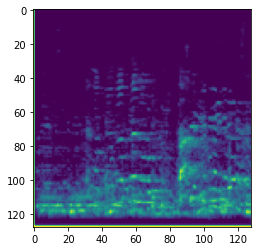

In [10]:
plt.imshow(x_train[7])